In [ ]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

In [ ]:
df = pd.read_csv('mtsamples.csv')

In [ ]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
df['medical_specialty'].count()

4999

In [ ]:
df = df[df['transcription'].notna()]
df = df[df['keywords'].notna()]


In [ ]:
df.count()

Unnamed: 0           3898
description          3898
medical_specialty    3898
sample_name          3898
transcription        3898
keywords             3898
dtype: int64

In [ ]:
diseases  = df.groupby(df['medical_specialty'])
i = 1

for dName,dCategory in diseases:
    
     print(' '+dName + ' : '+ str(len(dCategory)) )
     i = i+1


  Allergy / Immunology : 3
  Bariatrics : 18
  Cardiovascular / Pulmonary : 280
  Chiropractic : 4
  Consult - History and Phy. : 234
  Cosmetic / Plastic Surgery : 25
  Dentistry : 25
  Dermatology : 25
  Diets and Nutritions : 10
  Discharge Summary : 77
  ENT - Otolaryngology : 84
  Emergency Room Reports : 31
  Endocrinology : 15
  Gastroenterology : 195
  General Medicine : 146
  Hematology - Oncology : 62
  Hospice - Palliative Care : 5
  IME-QME-Work Comp etc. : 4
  Lab Medicine - Pathology : 8
  Letters : 20
  Nephrology : 63
  Neurology : 168
  Neurosurgery : 81
  Obstetrics / Gynecology : 130
  Office Notes : 44
  Ophthalmology : 79
  Orthopedic : 303
  Pain Management : 58
  Pediatrics - Neonatal : 42
  Physical Medicine - Rehab : 11
  Podiatry : 42
  Psychiatry / Psychology : 19
  Radiology : 251
  Rheumatology : 7
  SOAP / Chart / Progress Notes : 142
  Sleep Medicine : 18
  Speech - Language : 8
  Surgery : 1021
  Urology : 140


In [ ]:
selected_df = diseases.filter(lambda x:x.shape[0] > 75)
selected_df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."


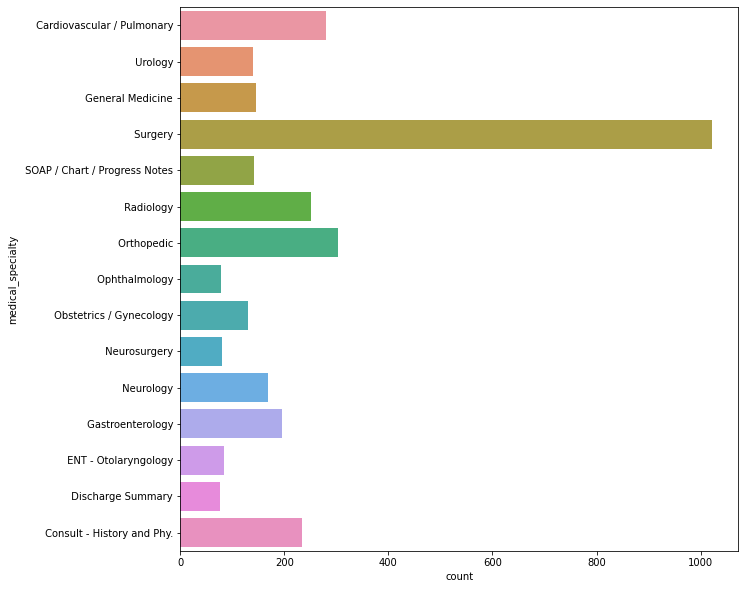

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = selected_df )
plt.show()

**WE HAVE OBSERVED THAT WE ARE DEALING WITH A HIGHLY IMBALANCED DATASET**

In [ ]:
data = selected_df[['transcription', 'medical_specialty']]


In [ ]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz (125.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
  Using cached thinc-8.0.17-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (668 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.9
    Uninstalling thinc-8.1.9:
      Successfully uninstalled thinc-8.1.9
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scispacy 0.5.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.0.9 which is 

In [ ]:
pip install spacy>=3.0


In [ ]:
pip install scispacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-3.4.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached thinc-8.1.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (922 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.0.9
    Uninstalling spacy-3.0.9:
      Successfully uninstalled spacy-3.0.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-ner-bc5cdr-md 0.4.0 requires spacy<3.1.0,>=3.0.1, but you have spacy 3.4.4 which is incompatible.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.4.4 which is incompatible.


In [ ]:
import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.9/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
nlp

In [ ]:
def func(sample):
  
  #name entity recognition 
  doc = nlp(sample)
  vec = []
  for ent in doc.ents:
    vec.append(ent.text)
  
  return vec

In [ ]:
feature = []

In [ ]:
data.count()

transcription        3331
medical_specialty    3331
dtype: int64

In [ ]:
rev_df = pd.DataFrame(data)

rev_df = rev_df.reset_index(drop=True)
rev_df.head()

,transcription,medical_specialty
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary


In [ ]:
for i in range(0,3331):
  sample = rev_df['transcription'][i]
  feature.append(func(sample))


In [ ]:
feature

[['atrial enlargement',
  'mitral and tricuspid regurgitation.,2',
  'pulmonary regurgitation'],
 ['ventricular outflow tract',
  'hyperdynamic left ventricular systolic function',
  'abnormal left ventricular relaxation',
  'valve stenosis',
  'mitral annular calcification',
  'thickening of mitral valve',
  'mitral regurgitation.,7',
  'pulmonary artery hypertension',
  'intracardiac mass seen.,10',
  'patent foramen ovale',
  'hypertrophy'],
 ['hypertrophy'],
 ['DESCRIPTION:,1', '60%.,4'],
 ['aortic stenosis',
  'left ventricular hypertrophy',
  'tricuspid regurgitation',
  'increase in right heart pressures',
  'tricuspid regurgitation',
  'increase in right heart pressures'],
 ['Airway obstruction',
  'subglottic tracheal stenosis',
  'Airway obstruction',
  'subglottic tracheal stenosis',
  'tracheomalacia',
  'airway obstruction',
  'tracheal stenosis',
  'bleeding',
  'infection',
  'loss of voice',
  'Xylocaine',
  'epinephrine',
  'inflammation scarring',
  'inflammation',
  

In [ ]:
rev_df['key_feature_extracted'] = feature
rev_df

,transcription,medical_specialty,key_feature_extracted
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,"[atrial enlargement, mitral and tricuspid regu..."
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,"[ventricular outflow tract, hyperdynamic left ..."
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,[hypertrophy]
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,"[DESCRIPTION:,1, 60%.,4]"
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,"[aortic stenosis, left ventricular hypertrophy..."
...,...,...,...
3326,"EXAM: , Left heart cath, selective coronary an...",Cardiovascular / Pulmonary,"[shortness of breath.,PROCEDURE, stenosis, ste..."
3327,"INDICATION:, Acute coronary syndrome.,CONSENT...",Cardiovascular / Pulmonary,"[death, myocardial infarction, cerebrovascular..."
3328,"ANGINA, is chest pain due to a lack of oxygen ...",Cardiovascular / Pulmonary,"[chest pain, oxygen, artery disease, arrhythmi..."
3329,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,"[Adenosine, noted.,SUMMARY:,1, adenosine]"


In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def pipeline(sample):
  tokens = word_tokenize(sample)
  # tokens_without_sw = [word for word in tokens if not word in stopwords.words()]
  tokens_lemma = [] 
  for j in tokens:
     tokens_lemma.append(lemmatizer.lemmatize(j))
  x = ''
  for i in tokens_lemma:
   x = x + " " +i 

  return x

In [ ]:
revised = []

In [ ]:
for i in range(0,3331):
  sample = rev_df['transcription'][i]
  revised.append(pipeline(sample))

In [ ]:
len(revised)

3331

In [ ]:
rev_df['desc_after_lemma'] = revised
rev_df.head()


,transcription,medical_specialty,key_feature_extracted,desc_after_lemma
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,"[atrial enlargement, mitral and tricuspid regu...","2-D M-MODE : , ,1 . Left atrial enlargement w..."
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,"[ventricular outflow tract, hyperdynamic left ...",1 . The left ventricular cavity size and wall...
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,[hypertrophy],"2-D ECHOCARDIOGRAM , Multiple view of the hea..."
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,"[DESCRIPTION:,1, 60%.,4]","DESCRIPTION : ,1 . Normal cardiac chamber siz..."
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,"[aortic stenosis, left ventricular hypertrophy...","2-D STUDY,1 . Mild aortic stenosis , widely c..."


In [ ]:
def sw_removal(text): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

In [ ]:
rev_df['desc_after_lemma_and_sw_removal'] = rev_df['desc_after_lemma'].apply(sw_removal)

In [ ]:
rev_df.head()

,transcription,medical_specialty,key_feature_extracted,desc_after_lemma,desc_after_lemma_and_sw_removal
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,"[atrial enlargement, mitral and tricuspid regu...","2-D M-MODE : , ,1 . Left atrial enlargement w...",d mmode left atrial enlargement with left...
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,"[ventricular outflow tract, hyperdynamic left ...",1 . The left ventricular cavity size and wall...,the left ventricular cavity size and wall t...
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,[hypertrophy],"2-D ECHOCARDIOGRAM , Multiple view of the hea...",d echocardiogram multiple view of the heart ...
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,"[DESCRIPTION:,1, 60%.,4]","DESCRIPTION : ,1 . Normal cardiac chamber siz...",description normal cardiac chamber size n...
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,"[aortic stenosis, left ventricular hypertrophy...","2-D STUDY,1 . Mild aortic stenosis , widely c...",d study mild aortic stenosis widely calcifi...


In [ ]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(rev_df['desc_after_lemma_and_sw_removal'].tolist() )
feature_names = sorted(vectorizer.get_feature_names_out())

In [ ]:
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1) 

In [ ]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(2498, 559)
Test_Set_Size:(833, 559)


In [ ]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
labels = category_list
cm = confusion_matrix(y_test, y_test_pred )

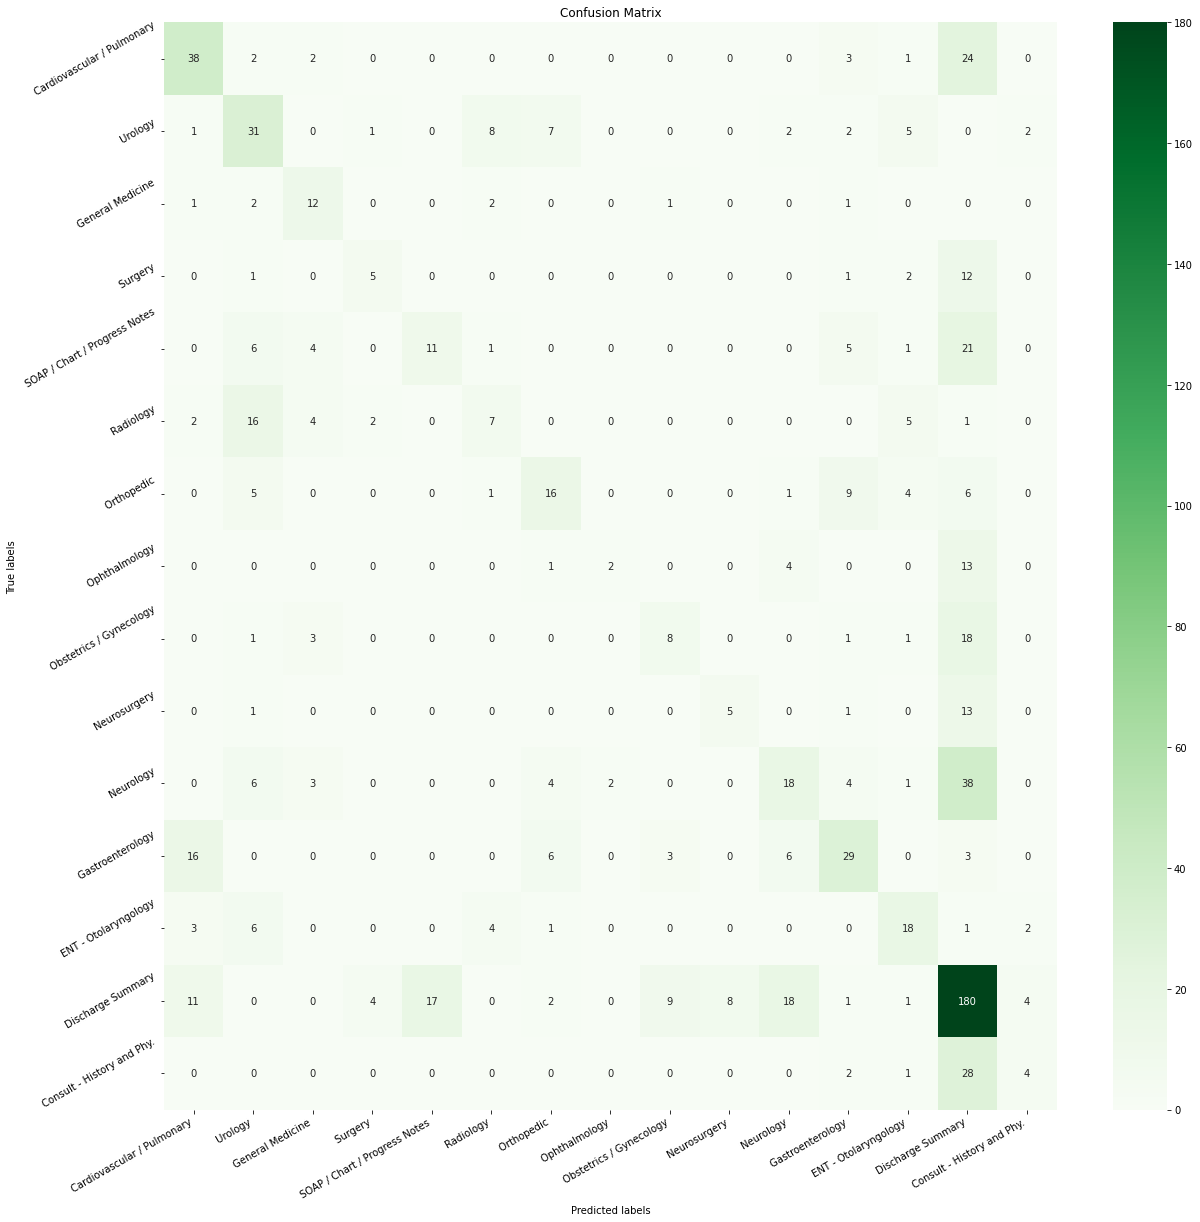

In [ ]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [ ]:
print(classification_report(y_test,y_test_pred,labels=category_list))

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.53      0.54      0.54        70
                       Urology       0.33      0.11      0.17        35
              General Medicine       0.30      0.19      0.23        37
                       Surgery       0.50      0.71      0.59       255
 SOAP / Chart / Progress Notes       0.45      0.51      0.48        35
                     Radiology       0.49      0.46      0.48        63
                    Orthopedic       0.37      0.24      0.29        76
                 Ophthalmology       0.38      0.25      0.30        20
       Obstetrics / Gynecology       0.38      0.25      0.30        32
                  Neurosurgery       0.50      0.10      0.17        20
                     Neurology       0.43      0.38      0.41        42
              Gastroenterology       0.39      0.22      0.29        49
          ENT - Otolaryngology       0.42      0.24      0.30  

transcription        3331
medical_specialty    3331
dtype: int64